# **Chen Portsia - ML Course - Assignment 1**

>This notebook presents my solution for Assignment 1 in the Machine Learning course taught by *Prof. Lev Muchnik* at the *Hebrew University*, Winter 2024.
>
>**Contents:**
>1. **TF-IDF Vectorizer Implementation** – Developing a custom TF-IDF vectorizer to transform a corpus of text documents into a matrix of TF-IDF features.
>2. **Building a Simple Search Engine** – Utilizing the custom TF-IDF vectorizer to rank documents based on their relevance to a given query.
>3. **Benchmarking: Custom TF-IDF vs. scikit-learn’s TfidfVectorizer** – Comparing performance and memory usage between the custom implementation and scikit-learn’s built-in TF-IDF vectorizer.
>4. **Sentiment Analysis of Tweets** – Using WordCloud visualizations and TF-IDF scores to analyze tweet sentiment and identify key terms.
>
>Created by: **Chen Portsia**

### **Task 1:** TF-IDF Vectorizer Implementation

**Function `tfidf_vectorizer`:**

> The function compute the TF-IDF representation for a corpus.

<u>**Parameters:**</u>
- `corpus` (list of str): List of documents.
- `min_freq` (int): Minimum number of times a word must appear in the corpus to be included in the vocabulary.

<u>**Returns:**</u>
- `vocab` (dict): Mapping from word to unique integer id.
- `doc_freq` (list): Document frequency vector (number of documents containing each word).
- `word_freq` (list): Global word frequency vector (total count of each word in the corpus).
- `tfidf_matrix` (np.ndarray): Matrix of shape (num_documents, vocab_size) with TF-IDF values.

***

#### <u>**Steps taken in the Function:**</u>
1. **Text Cleaning**  
   - Convert all text to lowercase.  
   - Remove punctuation, keeping only word characters and whitespace.

2. **Tokenization**  
   - Split each document into a list of words.

3. **Word Frequency Calculation**  
   - Count the total occurrences of each word across the entire corpus.

4. **Vocabulary Construction**  
   - Include only words appearing at least `min_freq` times.  
   - Assign a unique integer ID to each word in the vocabulary.

5. **Document Frequency Calculation**  
   - Count how many documents contain each word in the vocabulary.

6. **Global Word Frequency Calculation**  
   - Compute the total occurrences of each word in the corpus.

7. **TF-IDF Matrix Computation**  
   - Calculate **Inverse Document Frequency (IDF)** using: $$\text{idf} = \log\left(\frac{\text{num\_docs}}{\text{doc\_freq}}\right)$$
   - Compute **Term Frequency (TF)** for each document.  
   - Compute **TF-IDF values** using: $$\text{tf-idf} = \text{tf} \times \text{idf}$$


In [1]:
import re
import numpy as np
from collections import Counter

def tfidf_vectorizer(corpus, min_freq=1):

    # Convert each document to lowercase and remove punctuation.
    clean_corpus = []
    for doc in corpus:
        doc = doc.lower()  # Lowercase
        # Remove punctuation: keep only word characters and whitespace.
        doc = re.sub(r'[^\w\s]', '', doc)
        clean_corpus.append(doc)
    
    # Split each cleaned document into a list of words.
    docs_tokens = [doc.split() for doc in clean_corpus]
    
    # Count how many times each word occurs across the entire corpus.
    total_word_counts = Counter()
    for tokens in docs_tokens:
        total_word_counts.update(tokens)
    
    # Only include words that appear at least `min_freq` times.
    vocab_words = [word for word, count in total_word_counts.items() if count >= min_freq]
    # Sort vocabulary to have reproducible word-to-id assignments.
    vocab_words.sort()
    vocab = {word: idx for idx, word in enumerate(vocab_words)}
    
    # For each word in the vocabulary, count the number of documents that contain it.
    doc_freq = [0] * len(vocab)
    for tokens in docs_tokens:
        unique_tokens = set(tokens)
        for token in unique_tokens:
            if token in vocab:
                doc_freq[vocab[token]] += 1
                
    # For each word in the vocabulary, store its overall frequency.
    word_freq = [0] * len(vocab)
    for word, count in total_word_counts.items():
        if word in vocab:
            word_freq[vocab[word]] = count
            
    num_docs = len(corpus)
    vocab_size = len(vocab)
    tfidf_matrix = np.zeros((num_docs, vocab_size))
    
    # Compute Inverse Document Frequency (IDF) for each word.
    idf = np.log(num_docs / np.array(doc_freq))
    
    # For each document, compute term frequencies and then the TF-IDF values.
    for doc_idx, tokens in enumerate(docs_tokens):
        tf = Counter(tokens)
        for token, count in tf.items():
            if token in vocab:
                token_idx = vocab[token]
                tfidf_matrix[doc_idx, token_idx] = count * idf[token_idx]
    
    return vocab, doc_freq, word_freq, tfidf_matrix

#### Testing the TF-IDF Vectorizer with `tweets.txt`

In [2]:
# Load the tweets from the file.
with open('tweets.txt', 'r', encoding='utf-8') as f:
    tweets = f.read().splitlines()  

# Print the first few tweets to see what our corpus looks like.
print("First 5 tweets:")
for tweet in tweets[:5]:
    print("-", tweet)

# Print the number of tweets in the corpus.
print("\nNumber of tweets:", len(tweets))
# Remove duplicate tweets
tweets = list(set(tweets))
print("Number of unique tweets:", len(tweets))
# Remove tweets with less than 1 word
tweets = [tweet for tweet in tweets if len(tweet.split()) >= 1]
print("Number of tweets with at least 1 word:", len(tweets))

First 5 tweets:
- RT @KirkKus: Indirect cost of the UK being in the EU is estimated to be costing Britain £170 billion per year! #BetterOffOut #UKIP
- VIDEO: Sturgeon on post-election deals http://t.co/BTJwrpbmOY
- RT @LabourEoin: The economy was growing 3 times faster on the day David Cameron became Prime Minister than it is today.. #BBCqt http://t.co…
- RT @GregLauder: the UKIP east lothian candidate looks about 16 and still has an msn addy http://t.co/7eIU0c5Fm1
- RT @thesundaypeople: UKIP's housing spokesman rakes in £800k in housing benefit from migrants.  http://t.co/GVwb9Rcb4w http://t.co/c1AZxcLh…

Number of tweets: 25287
Number of unique tweets: 11605
Number of tweets with at least 1 word: 11602


In [3]:
# Set the minimum frequency threshold (e.g., words appearing fewer than 2 times are ignored)
min_freq = 2

# Apply the TF-IDF vectorizer to the tweets corpus.
vocab, doc_freq, word_freq, tfidf_matrix = tfidf_vectorizer(tweets, min_freq)

# Print the outputs.
print("\nVocabulary (word to id mapping):")
print(vocab)

print("\nDocument Frequency vector (number of documents each word appears in):")
print(doc_freq)

print("\nWord Frequency vector (total occurrences of each word in the corpus):")
print(word_freq)

print("\nTF-IDF Matrix (shape {}):".format(tfidf_matrix.shape))
print(tfidf_matrix)


Vocabulary (word to id mapping):
{'0': 0, '000s': 1, '0604arb1320': 2, '08': 3, '1': 4, '10': 5, '100': 6, '1000': 7, '100000': 8, '100k': 9, '101': 10, '1050': 11, '1050pm': 12, '10x': 13, '11': 14, '11pm': 15, '12': 16, '12billion': 17, '12bn': 18, '13': 19, '14': 20, '144k': 21, '145': 22, '15': 23, '150': 24, '15000': 25, '150k': 26, '15th': 27, '16': 28, '17': 29, '17kennymc': 30, '18': 31, '19': 32, '1950s': 33, '1964': 34, '1979': 35, '1979i': 36, '1980s': 37, '1992': 38, '1997': 39, '1b': 40, '1billion': 41, '1johnmacdonald': 42, '1markconway': 43, '1pt': 44, '1st': 45, '2': 46, '20': 47, '2000ayear': 48, '2007': 49, '200711': 50, '2008': 51, '2010': 52, '2011': 53, '2012': 54, '2014': 55, '2015': 56, '20150501': 57, '2016': 58, '2017': 59, '2020': 60, '21': 61, '21st': 62, '22': 63, '2250': 64, '2250pm': 65, '23': 66, '24': 67, '25': 68, '26': 69, '27': 70, '270': 71, '28': 72, '29': 73, '2930': 74, '2b': 75, '2hav': 76, '2indy': 77, '2nd': 78, '2nite': 79, '2tweetaboutit': 8

### **Task 2:** Building a Simple Search Engine

**Function `search`:**
> Search for tweets that best match the query using cosine similarity.
    
<u>**Parameters:**</u>
- `tfidf_data` (tuple): A tuple containing (vocab, doc_freq, word_freq, tfidf_matrix) produced by the tfidf_vectorizer.
- `tweets` (list of str): The list of original tweets.
- `query` (str): The search query string.
- `n_matches` (int): The number of top matching tweets to return.
        
<u>**Returns:**</u>
- `top_tweets` (list of str): List of tweets ranked by similarity to the query.
- `top_scores` (list of float): List of cosine similarity scores corresponding to the tweets.

***

#### <u>**Steps taken in the Function:**</u>

1. **Unpack TF-IDF Data**  
   - Extracts `vocab`, `doc_freq`, `word_freq`, and `tfidf_matrix` from `tfidf_data`.  
   - Determines the number of documents (`num_docs`) and vocabulary size (`vocab_size`).

2. **Preprocess the Query**  
   - Converts the query to lowercase and removes punctuation (to match the preprocessed corpus).  
   - Tokenizes the query into words.

3. **Compute the Query's TF-IDF Vector**  
   - Computes the **Inverse Document Frequency (IDF)**
   - Constructs a **TF-IDF vector** for the query using term frequency multiplied by IDF.

4. **Handle Empty Query Cases**  
   - If the query contains no words from the vocabulary, it returns an empty result.

5. **Compute Cosine Similarity**  
   - Computes the **cosine similarity** between the query vector and each document’s TF-IDF vector:$$\cos(\theta) = \frac{\mathbf{A} \cdot \mathbf{B}}{\|\mathbf{A}\| \|\mathbf{B}\| + \epsilon}$$
     where:
     - ${\mathbf{A}}$ is the query vector.
     - ${\mathbf{B}}$ is a document vector.
     - ${\epsilon}$ prevents division by zero.

6. **Retrieve Top Matching Tweets**  
   - Sorts tweets by **descending similarity score**.  
   - Returns the **top `n_matches` tweets** along with their similarity scores.

In [4]:
def search(tfidf_data, tweets, query, n_matches=5):

    # Unpack tfidf data
    vocab, doc_freq, word_freq, tfidf_matrix = tfidf_data
    num_docs = tfidf_matrix.shape[0]
    vocab_size = len(vocab)
    
    # Preprocess the Query
    query_processed = query.lower()
    query_processed = re.sub(r'[^\w\s]', '', query_processed)
    query_tokens = query_processed.split()
    
    # Compute the Query TF-IDF Vector
    idf = np.log(num_docs / np.array(doc_freq))
    
    # Build the query vector using term frequency * idf
    query_vec = np.zeros(vocab_size)
    query_counter = Counter(query_tokens)
    for token, count in query_counter.items():
        if token in vocab:
            token_idx = vocab[token]
            query_vec[token_idx] = count * idf[token_idx]
    
    # If the query vector is all zeros, then no query words were in the vocabulary.
    query_norm = np.linalg.norm(query_vec)
    if query_norm == 0:
        print("No query terms found in vocabulary.")
        return [], []
    
    # Compute Cosine Similarity
    dot_products = np.dot(tfidf_matrix, query_vec)
    doc_norms = np.linalg.norm(tfidf_matrix, axis=1)
    
    # Add a small epsilon to avoid division by zero
    epsilon = 1e-10
    cosine_similarities = dot_products / (doc_norms * query_norm + epsilon)
    
    # Retrieve Top Matching Tweets
    top_indices = np.argsort(-cosine_similarities)[:n_matches]
    top_tweets = [tweets[i] for i in top_indices]
    top_scores = [cosine_similarities[i] for i in top_indices]
    
    return top_tweets, top_scores

In [5]:
# Example queries:
example_queries = [
    "Love this",
    "Great adventure",
    "Politics", 
    "Political",
    "International relations",
    "Spelling mistake",
    "Speling mistaek"
]

# Run each query and print the results.
for query in example_queries:
    print(f"\nQuery: '{query}'")
    results, scores = search((vocab, doc_freq, word_freq, tfidf_matrix), tweets, query, n_matches=5)
    if results:
        for tweet, score in zip(results, scores):
            print(f"Score: {score:.4f} - Tweet: {tweet}")
    else:
        print("No results found.")


Query: 'Love this'
Score: 0.7903 - Tweet: Love Farage 😂
Score: 0.6953 - Tweet: Love Nigel Farage 🙌🏻
Score: 0.5930 - Tweet: Labours new song :  We love Tories more than Scots..we love Tories more than Scots we love Tories we love Tories...
Score: 0.5926 - Tweet: RT @ScotlandClare: Labours new song :  We love Tories more than Scots..we love Tories more than Scots we love Tories we love Tories...
Score: 0.5908 - Tweet: #bbcqt  Labours new song :  We love Tories more than Scots..we love Tories more than Scots we love Tories we love Tories...

Query: 'Great adventure'
Score: 0.7881 - Tweet: RT @Bonn1eGreer: A great, great audience 
Score: 0.4793 - Tweet: Nigel Farage sounds great on [Mute] #AskNigelFarage #GE2015
Score: 0.4603 - Tweet: Got a great joke 4 you all ... 
Score: 0.4503 - Tweet: @AbysmiOs @stinkfisttt Les Mis is fucking great mane
Score: 0.4285 - Tweet: @afneil great some sense after Farage;)

Query: 'Politics'
Score: 0.7402 - Tweet: Politics News - UK Politics: BBC Question Tim

> Overall, the search engine performs well for exact matches, returning relevant results when the query words appear in both the tweets and the vocabulary. However, it fails for misspelled or rare terms that do not exist in the vocabulary, thus missing the broader concept behind the query.<br>
>Additionally, because the TF-IDF model is trained on a relatively small corpus, the vocabulary and topics it can handle are limited. This restricts the engine’s ability to manage nuanced or less common queries.

### **Task 3:** Benchmarking Custom TF‑IDF Vectorizer and scikit‑learn’s TfidfVectorizer

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import time
import tracemalloc

# Get the full unfiltered tweets corpus.
with open('tweets.txt', 'r', encoding='utf-8') as f:
    tweets = f.read().splitlines()  

min_freq = 1

# Measure Custom TF-IDF vectorizer performance and memory usage
tracemalloc.start()
start_time = time.time()
custom_data = tfidf_vectorizer(tweets, min_freq)
custom_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print("Custom TF-IDF vectorizer time: {:.4f} seconds".format(custom_time))
print("Custom TF-IDF vectorizer memory usage: Current = {:.2f} MB, Peak = {:.2f} MB".format(current / (1024*1024), peak / (1024*1024)))

# Configure scikit-learn vectorizer with similar preprocessing.
sklearn_vec = TfidfVectorizer(lowercase=True,
                token_pattern=r'\w+',
                min_df = min_freq)

# Measure scikit-learn TfidfVectorizer performance and memory usage
tracemalloc.start()
start_time = time.time()
sklearn_matrix = sklearn_vec.fit_transform(tweets)
sklearn_time = time.time() - start_time
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()
print("scikit-learn TfidfVectorizer time: {:.4f} seconds".format(sklearn_time))
print("scikit-learn TfidfVectorizer memory usage: Current = {:.2f} MB, Peak = {:.2f} MB".format(current / (1024*1024), peak / (1024*1024)))
print()
# Calculate the performance improvement in time and memory
time_improvement = custom_time / sklearn_time
memory_improvement = peak / current

print("scikit-learn is {:.2f} times faster than the custom TF-IDF vectorizer.".format(time_improvement))
print("scikit-learn uses {:.2f} times less memory than the custom TF-IDF vectorizer.".format(memory_improvement))

Custom TF-IDF vectorizer time: 4.3481 seconds
Custom TF-IDF vectorizer memory usage: Current = 3875.53 MB, Peak = 3903.08 MB
scikit-learn TfidfVectorizer time: 1.5191 seconds
scikit-learn TfidfVectorizer memory usage: Current = 6.91 MB, Peak = 12.78 MB

scikit-learn is 2.86 times faster than the custom TF-IDF vectorizer.
scikit-learn uses 1.85 times less memory than the custom TF-IDF vectorizer.


> scikit-learn is both significantly faster and more memory-efficient than the custom function we built.

### **Task 4:** Sentiment Analysis of Tweets with WordCloud and TF-IDF

#### <u>**Code Explanation:**</u>

1. **Text Cleaning & Preprocessing:**
   - The function `clean_text` converts text to lowercase, removes punctuation, stopwords, and words with one character or less.
   - Additional common words (`'im', 'hi', 'follow', etc.`) are added to the stopword list.

2. **Loading & Cleaning Tweets:**
   - Tweets are loaded from `negative_tweets.txt` and `positive_tweets.txt`.
   - The text is cleaned, and duplicates and empty tweets are removed.

3. **WordCloud Visualization:**
   - WordCloud is generated using the `WordCloud` library to visually compare the most frequent words in positive and negative tweets.

4. **TF-IDF Analysis:**
   - The `TfidfVectorizer` is used to extract the most important words by calculating TF-IDF scores.
   - The top 10 words with the highest TF-IDF scores are printed for both positive and negative tweets.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


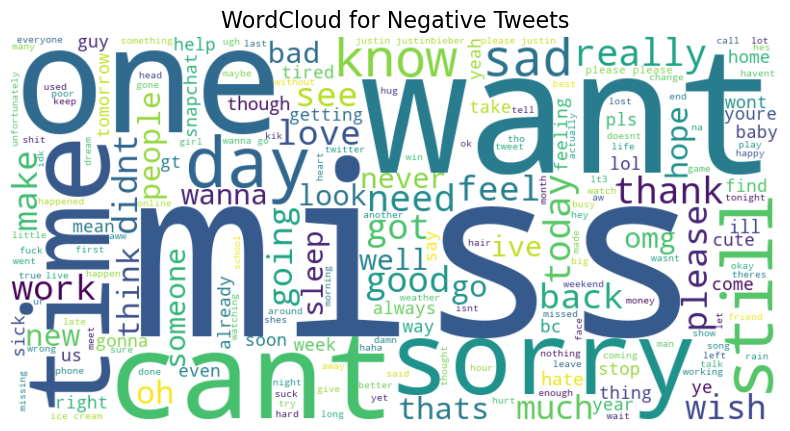

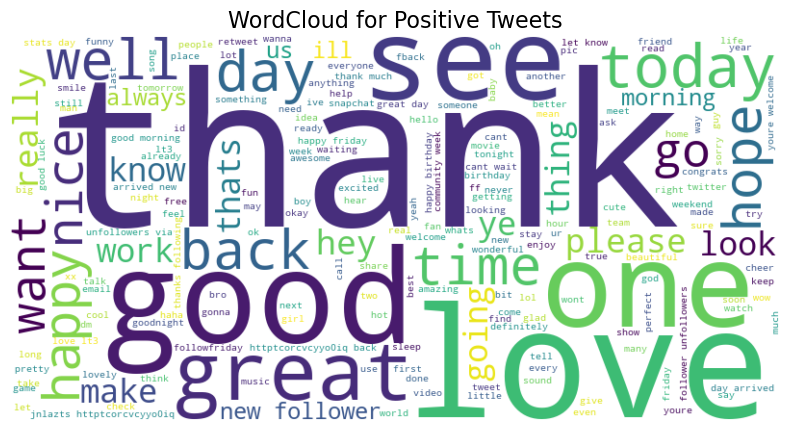

In [7]:
import re
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Add words to the stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Exclude words from corpus:
additional_stopwords = ['im', 'hi','follow','followed','dont','amp','like']
# Update stop words with additional words to exclude
stop_words.update(additional_stopwords)

def clean_text(text):
    text = text.lower()
    # Remove punctuation (keep only alphanumeric and whitespace)
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords and words with less than one character
    text = ' '.join(word for word in text.split() if word not in stop_words and len(word) > 1)
    return text

# Load tweets from file
def load_tweets(filename):
    with open(filename, 'r', encoding='utf-8') as f:
        tweets = f.read().splitlines()
    # Clean each tweet
    cleaned = [clean_text(tweet) for tweet in tweets]
    return cleaned

# Load negative and positive tweets
negative_tweets = load_tweets('negative_tweets.txt')
positive_tweets = load_tweets('positive_tweets.txt')

# Filter out empty tweets and remove duplicates
negative_tweets = list(set([tweet for tweet in negative_tweets if tweet]))
positive_tweets = list(set([tweet for tweet in positive_tweets if tweet]))

def plot_wordcloud(text_list, title):
    # Join all tweets into a single string
    text = " ".join(text_list)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Plot word clouds for negative and positive tweets
plot_wordcloud(negative_tweets, "WordCloud for Negative Tweets")
plot_wordcloud(positive_tweets, "WordCloud for Positive Tweets")

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def top_tfidf_terms(corpus, n_top=10):
    # Use English stop words to filter out common words
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(corpus)
    
    # Sum TF-IDF scores for each term over all documents.
    tfidf_sum = np.asarray(tfidf_matrix.sum(axis=0)).flatten()
    
    # Get feature names and sort by TF-IDF sum in descending order.
    feature_names = np.array(vectorizer.get_feature_names_out())
    sorted_indices = np.argsort(tfidf_sum)[::-1]
    
    top_terms = feature_names[sorted_indices][:n_top]
    top_scores = tfidf_sum[sorted_indices][:n_top]
    
    return list(zip(top_terms, top_scores))

# Filter out the additional stop words from the negative and positive tweets
negative_tweets = [' '.join(word for word in tweet.split() if word not in stop_words and len(word) > 1) for tweet in negative_tweets]
positive_tweets = [' '.join(word for word in tweet.split() if word not in stop_words and len(word) > 1) for tweet in positive_tweets]

# Get top terms for negative tweets
print("Top terms in negative tweets (by aggregate TF-IDF):")
neg_top_terms = top_tfidf_terms(negative_tweets, n_top=10)
for term, score in neg_top_terms:
    print(f"{term}: {score:.4f}")

print("\nTop terms in positive tweets (by aggregate TF-IDF):")
pos_top_terms = top_tfidf_terms(positive_tweets, n_top=10)
for term, score in pos_top_terms:
    print(f"{term}: {score:.4f}")

Top terms in negative tweets (by aggregate TF-IDF):
miss: 74.4237
want: 62.3216
sorry: 43.6681
know: 37.3465
time: 36.7614
really: 36.2441
sad: 34.8045
sleep: 34.3200
thanks: 32.7947
wanna: 31.8926

Top terms in positive tweets (by aggregate TF-IDF):
thanks: 90.6296
love: 74.3476
thank: 68.7419
good: 60.1615
day: 54.4746
happy: 52.4964
great: 44.7018
new: 38.4339
know: 37.5893
friday: 35.1610


>We can see that the results make sence since the results are logical and align with expectations.  
>- **Negative Sentiment:**  
  High-frequency words such as `"miss"`, `"want"`, `"sorry"`, `"sad"`, `"sleep"`, and `"wanna"` reflect negative emotions, indicating longing, regret, and distress.  
>- **Positive Sentiment:**  
  Words like `"thanks"`, `"love"`, `"thank"`, `"good"`, `"happy"`, and `"great"` are strong indicators of gratitude and positivity, reinforcing an optimistic tone.  
>- **Shared Words with Different Weights:**  
  The word `"know"` appears in both lists but ranks lower in positive tweets, suggesting it may have different contextual meanings across sentiments.  
>- **TF-IDF Analysis:**  
  TF-IDF helps distinguish sentiment-specific words, highlighting **"miss" (74.42)** as particularly significant in negative tweets, while **"thanks" (90.62)** is the most distinctive term in positive tweets.  